<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_YB_week12_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝 완벽가이드
p399-430

##06. 차원축소
: 매우 많은 피처로 구성된 다차원 데이터세트의 차원을 축소해 새로운 차원의 데이터 세트 생성
- 차원 증가 -> 데이터 포인트 간 거리가 멀어짐, 희소(sparse)한 구조 가짐
- 피처 많음 -> 개별 피처 간 상관관계 높을 수 있음 => 선형 모델에서는 다중 공선성 문제 발생
- 차원 축소 -> 직관적 데이터 해석 (시각적 표현)
- 학습 데이터 크기 줄어듬-> 처리 줄일수있음

**피처 선택**
- 특정 피처에 종속성이 강한 불필요한 피처는 제거

**피처 추출**
- 기존 피처를 저차원의 중요 피처로 압축해서 추출 => 완전히 다른 값이 됨
- 잠재적인 요소 추출

EX) PCA, SVD, NMF 알고리즘

- 이미지 데이터에서 잠재 특성을 피처로 도출 -> 함축된 이미지 변환과 압축 수행
- 분류 수행 시 과적합 영향력 작아짐 -> 예측성능 향상
- 텍스트 문서의 의미 추출-> semantic의미, 토픽 찾아냄

*SVD, NMF* :시맨틱 토픽 모델링을 위한 기반 알고리즘

### **PCA (principal component analysis)**
: 여러 변수 간에 존재하는 상관관계 이용해 대표하는 주성분 추출 -> 차원 축소
- 기존 데이터의 정보유실 최소화
- 가장 높은 분산을 갖는 데이터 축 기준으로 축소 => PCA의 주성분 (첫번째 벡터 축)
- 첫번째 벡터 축의 직교하는 벡터= 두번째 벡터축
- 두번째 축과 직교하는 벡터 = 세번째 축

**벡터 축의 개수만큼의 차원으로 원본 데이터 축소**

*선형대수 관점*
-> 입력 데이터의 공분산 행렬을 고유값 분해하고, 고유벡터에 입력데이터 선형 변환
- 고유벡터 = PCA의 주성분 벡터, 입력 데이터의 분산이 큰 방향
- 고윳값 = 고유 벡터의 크기, 입력 데이터의 분산
- 선형 변환 : 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것 => 특정 벡터를 하나의 공간에서 다른 공간으로 투영
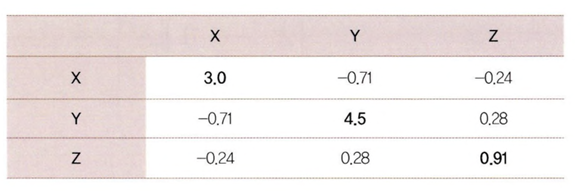

- X,Y,Z의 분산은 3, 4.5, 0.91


- 고유벡터 : 행렬 A를 곱하더라도 방향 변하지않고 크기만 변하는 벡터지칭
- 공분산 행렬식 C= P(sigma)P.t

: P는 n*n 직교행렬, sigma는 n*n 정방행렬
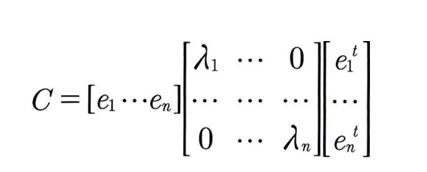
- 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될수있음
- 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식 = PCA

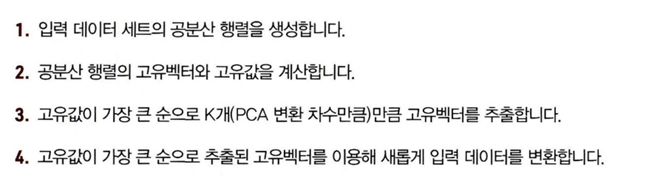


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris= load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF= pd.DataFrame(iris.data, columns= columns)
irisDF['target']= iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


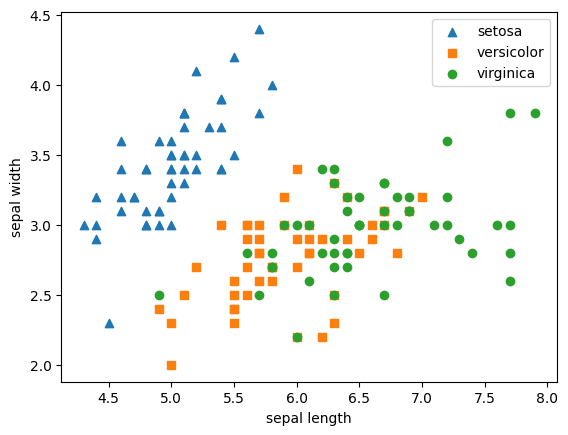

In [7]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers= ['^','s','o']

#setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] ==i]['sepal_length']
    y_axis_data = irisDF[irisDF ['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

# Target을 제외한 모든 속성 스케일링
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])


In [9]:
#PCA 변환, 4->2 차원
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

print(iris_pca.shape)


(150, 2)


In [27]:
# DataFrame 생성
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)


,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


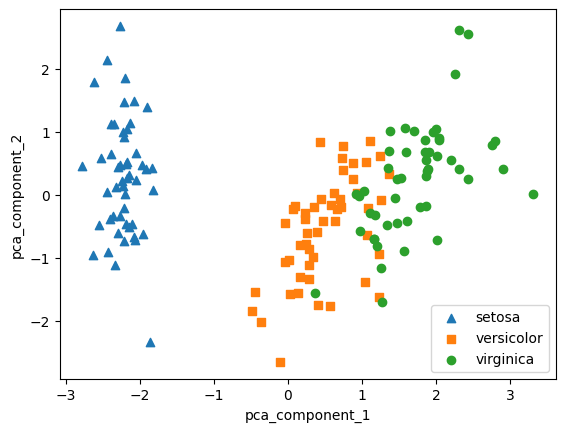

In [11]:
import matplotlib.pyplot as plt

markers = ['^', 's', 'o']   # setosa, versicolor, virginica

for i, marker in enumerate(markers):
    x_axis = irisDF_pca[irisDF_pca['target'] == i]['pca_component_1']
    y_axis = irisDF_pca[irisDF_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis, y_axis, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [12]:
#PCA 설명 분산
print(pca.explained_variance_ratio_)


[0.72962445 0.22850762]


In [13]:
# randomforest랑 원본 데이터 성능비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rf, iris.data, iris.target, scoring='accuracy', cv=3)

print("원본 데이터 교차 검증 개별 정확도:", scores)
print("원본 데이터 평균 정확도:", np.mean(scores))


원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [14]:
# RandomForest - PCA 변환 데이터 성능 비교
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rf, pca_X, iris.target, scoring='accuracy', cv=3)

print("PCA 변환 데이터 교차 검증 개별 정확도:", scores_pca)
print("PCA 변환 데이터 평균 정확도:", np.mean(scores_pca))


PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


### 신용카드 고객 데이터 차원 축소

In [25]:
# header로 의미없는 첫행 제거, iloc로 기존 id 제거
import pandas as pd
df = pd.read_excel('/content/default of credit card clients.xls', header=1, sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df.head(3)


(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [26]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)

y_target = df['default']
X_features = df.drop('default', axis=1)

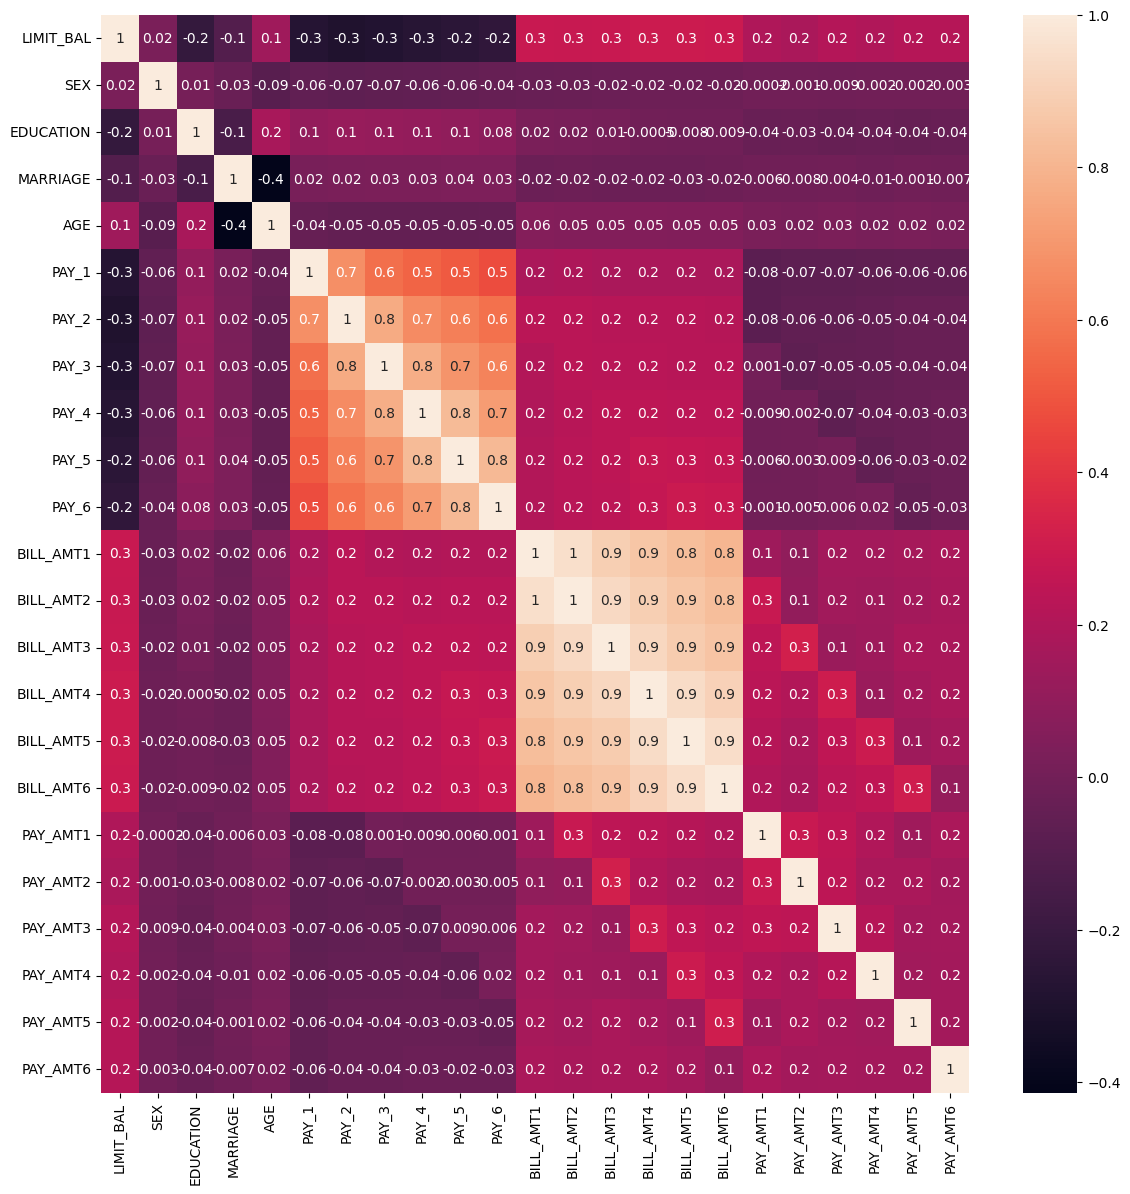

In [24]:
#상관도 분석
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')
plt.show()


- BILL_AMT1~6 속성끼리 상관도 매우 높음
- PAY_1~6 속성도 높은 상관도 가짐


In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# PCA 적용 (BILL_AMT1~6 -> 2개의 PCA)
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성:', pca.explained_variance_ratio_)
# Output: [0.90555253 0.050986]


PCA Component별 변동성: [0.90555253 0.0509867 ]


- 2개로 6개의 속성 변동성 약 95퍼 설명
- 첫번째 PCA가 전체 변동성의 90퍼 차지

In [22]:
# Random Forest 분류 예측
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))



CV=3인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


In [21]:
# PCA 변환 데이터 (6개 component)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)
print('CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))



CV=3 인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7912 0.7974 0.802 ]
PCA 변환 데이터 세트 평균 정확도:0.7969


- 23개 속성 -> 6개 PCA : 약 1-2% 성능 저하
- PCA 압축 능력 확인

###03. LDA(linear discriminant analysis)
: 선형 판별 분석법
- 입력 데이터 세트를 저차원 공간에 투영해 차원 축소
- 지도학습 분류에서 개별 클래스 분별할수있는 기준으로 차원 축소
- 입력 데이터의 결정 값 클래스를 최대한으로 분리할수있는 축 찾기
- 클래스 간 분산 크게 / 클래스 내부 분산 작게
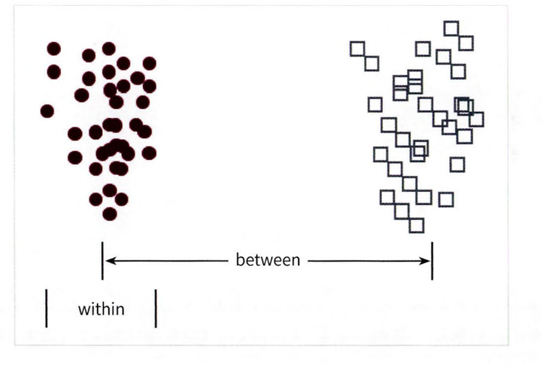
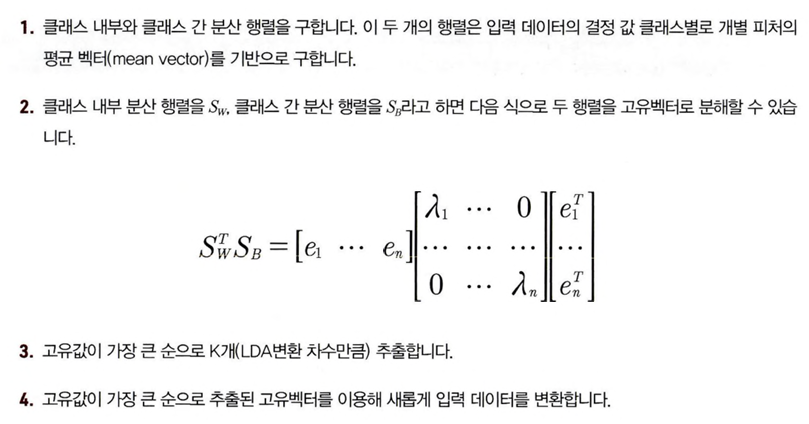

In [28]:
# 붓꽃데이터 세트에 LDA 적용하기
# 표준 정규 분포로 스케일링
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)


In [29]:

# 2개의 컴포넌트로 붓꽃 데이터를 LDA 변환
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)


(150, 2)


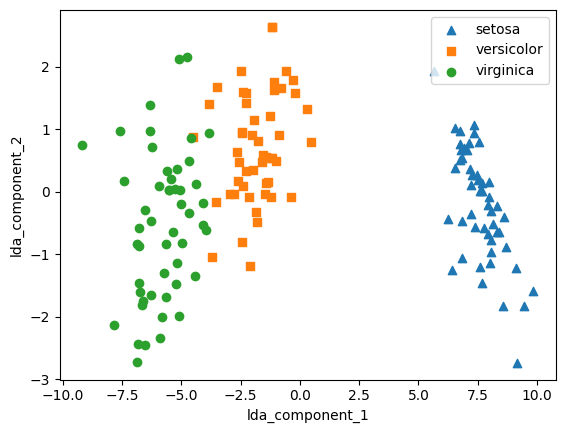

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미
markers = ['^', 's', 'o']

# 산점도
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()


###04. SVD (singular value decomposition)
: 행렬 분해 기법
- 정방행렬뿐 아니라 행, 열 크기 다른 행렬에도 적용가능
- A= U(sigam)V.t
- 특이값 분해 -> 행렬 U,V에 속한 벡터는 특이벡터 ( 서로 직교함)
- sigma에 위치한 0이 아닌 값이 행렬 A의 특이값
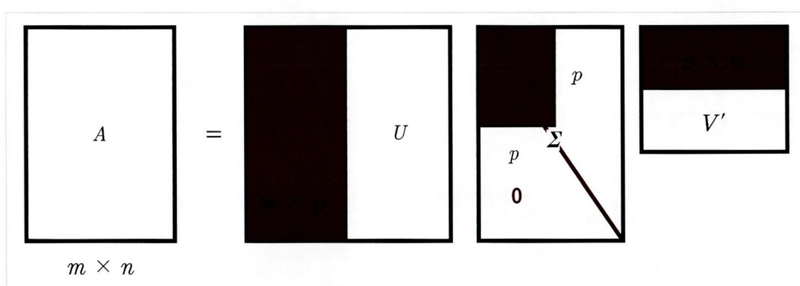

### Truncated SVD
: sigma의 대각원소 중 몇개 추출해서 여기에 대응하는 U, V원소도 함께 제거해 차원 줄인 형태로 분해

In [32]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a= np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- a 행렬에 SVD 적용해 U, sigma, Vt 도출

In [33]:

U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [34]:
# SVD로 원본 복원
# Sigma를 대칭행렬로 변환
Sigma_jmat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_jmat), Vt)
print(np.round(a_, 3))


[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [35]:
# 3번째 로우 = 1번째 + 2번째, 4번째 로우 = 1번째
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [36]:
# 다시 SVD 수행
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [37]:
# Rank 축소 후 복원
# 앞의 2개 특이값만 이용
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2, :]
print(U_.shape, Sigma_.shape, Vt_.shape)

a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))


(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [38]:
import numpy as np
from scipy.linalg import svd
from scipy.sparse.linalg import svds

# 6x6 원본 행렬
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n', matrix)

# 일반 SVD
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('Sigma 값:', Sigma)

# Truncated SVD
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('Truncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('Truncated SVD Sigma 값:', Sigma_tr)

# Truncated SVD로 복원
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)
print('복원 행렬:\n', matrix_tr)


원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]
분해 행렬 차원: (6, 6) (6,) (6, 6)
Sigma 값: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]
Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)
Truncated SVD Sigma 값: [0.55463089 0.83865238 0.88116505 3.2535007 ]
복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59

사이킷런 TruncatedSVD 클래스를 이용한 변환

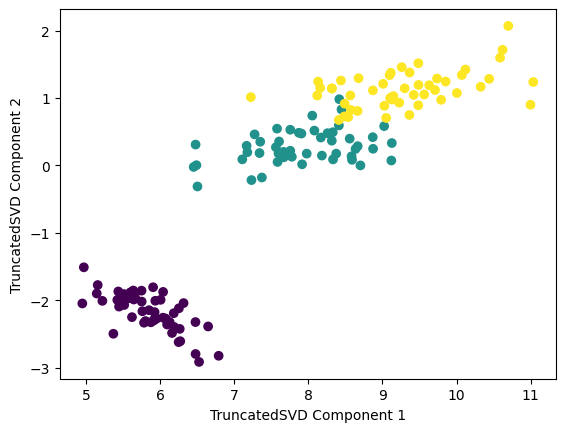

In [39]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 2차원 산점도
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()


Scaled 데이터 기반 TruncatedSVD vs PCA 비교


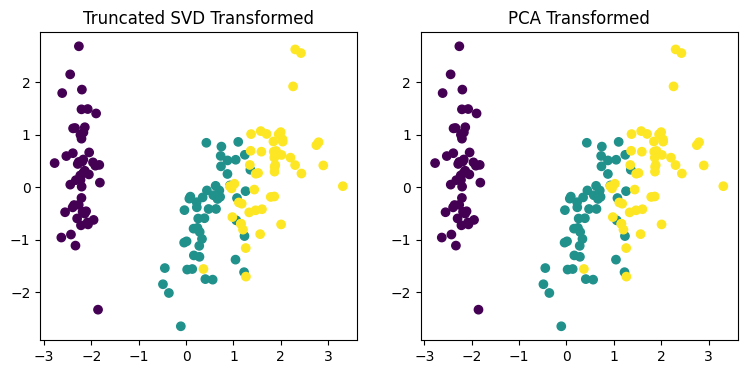

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# TruncatedSVD
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# PCA
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# 비교 시각화
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax2.set_title('PCA Transformed')
plt.show()


In [41]:

# 변환 값 비교
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())


2.3390953525955403e-15
-7.632783294297951e-17


PCA와 SVD: 고차원 데이터의 잠재 요소 추출, 차원 축소

Truncated SVD: 상위 k개 특이값만 사용, 근사 복원

Scikit-learn PCA는 내부적으로 SVD 기반


###05. NMK (Non-negative matrix factorization)
: Truncated SVD 같이 낮은 랭크를 통한 행렬 근사 방식의 변형
- NMF는 모든 값이 양수인 행렬을 두 개의 행렬로 분해

- 행렬 W: 원본 행 데이터 기준 잠재 요소 값

- 행렬 H: 원본 열 데이터 기준 잠재 요소 구성

- 이미지 압축, 텍스트 토픽 모델링, 추천 시스템에 활용
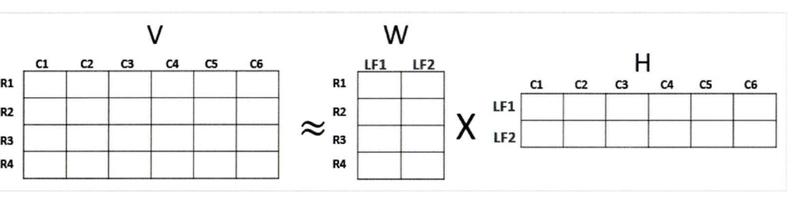

/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


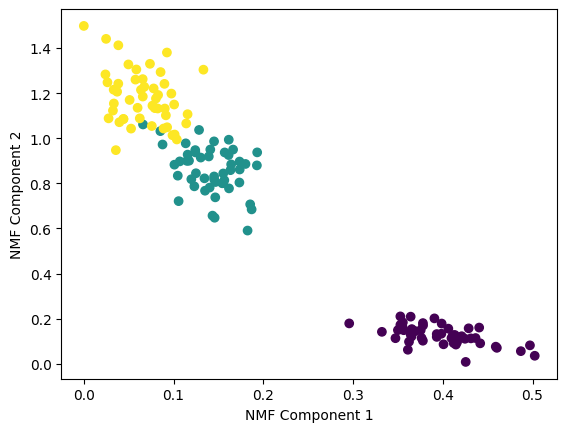

In [42]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()
